<a href="https://colab.research.google.com/github/deacona/stuff/blob/master/Copy_of_Precision_Recall_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precision/Recall Optimisation
This notebook will walk you through the process of building a Machine Learning model for predicting if a patient **has pneumonia** or **not** based on their X-ray image.

Then you will be tasked with optiising the model for **precision** or **recall** based on your desired application.

![alt text](https://raw.githubusercontent.com/ZackAkil/machine-learning-trenches-and-highways/master/misc/xray.png)

Learning outcomes:

1.   Importing data and building an image classifier
2.   Getting raw score predictions and class predictions
3.   Visualising model performance using a confusion matrix
4.   🌟Optimising model decision threshold using Precision/Recall scores
5.   Deploying a model using your desired decision threshold.

In [0]:
#@title 1. Run this code to check-in to the workshop 

#@markdown Give yourself a unique **student id** and then *click on the* ▶ *button* on the left:

STUDENT_ID = "Adam D" #@param {type:"string"}

if STUDENT_ID:

  import requests

  WORKSHOP_ID = "CLDS1_PR"

  def submit_answer(task_id, answer):
    submission_url = 'https://us-central1-remote-workshop.cloudfunctions.net/workshop_submission'
    r = requests.post(submission_url, json={"workshop_id": WORKSHOP_ID,
                                      "student_id": STUDENT_ID,
                                      "task_id": task_id,
                                      "answer": str(answer)})
    output = r.text
    if (r.text == 'sorry') or not r.ok:
      print('❌ Oops, that answer isnt quite right')
    else:
      print('✔️ Correct! You can progress to the next section')


  sign_in_url = 'https://us-central1-remote-workshop.cloudfunctions.net/workshop_checkin'
  r = requests.post(sign_in_url, json={"workshop_id": WORKSHOP_ID,
                                      "student_id":STUDENT_ID})

  print(r.text)
else:
  print('⚠️ Please enter in your student name/id')

student checked into workshop


### 2. Let's test to see that everything is working

In [0]:
# [TASK] Fill in the answer to the ultimate question
# YOUR CODE STARTS HERE

two_plus_two = 4

# YOUR CODE ENDS HERE

print(two_plus_two)
submit_answer('task_1', two_plus_two)

4
✔️ Correct! You can progress to the next section


## 3. Download dataset
We have the dataset of x-ray images and labels stored remotly.
Run the following cell to download to data into the notebook.

In [0]:
!gsutil cp gs://meetup-datasets/pneumonia.obj .

import os.path

# check if dataset file exists
if os.path.isfile('pneumonia.obj'):
    print('exists')
    submit_answer('task_2', 1)
else:
    print('missing, try downloading the data again')
    submit_answer('task_2', 0)

Copying gs://meetup-datasets/pneumonia.obj...
\ [1 files][ 97.7 MiB/ 97.7 MiB]                                                
Operation completed over 1 objects/97.7 MiB.                                     
exists
✔️ Correct! You can progress to the next section


## 4. Load data 

Read dataset into the python environment by specifying the file name of the dataset (`pneumonias.obj`). 



In [0]:
import numpy as np
import pickle 

# [TASK] Specifying the filename of the dataset
# YOUR CODE STARTS HERE

file_name = "pneumonia.obj"

# YOUR CODE ENDS HERE

print(file_name)
submit_answer('task_3', file_name)

# open dataset file
with open(file_name, 'rb') as file: 
  data = pickle.load(file)  

pneumonia.obj
✔️ Correct! You can progress to the next section


## 5. Make our `input` and `output` data variables

In [0]:
# get the input images and assign them to X
X = data['images']

# get the output labels and assign them to y
y = data['labels']

## 6. Let's look at the `shape` of our data 

In [0]:
# get the shape of the input data
X.shape

(2000, 80, 80, 1)

In [0]:
# [TASK] get the shape of the output data (y) and assign it to output_shape
# YOUR CODE STARTS HERE

output_shape = y.shape

# YOUR CODE ENDS HERE

print(output_shape)
submit_answer('task_4', output_shape)

(2000,)
✔️ Correct! You can progress to the next section


## 7. Look at some of the images

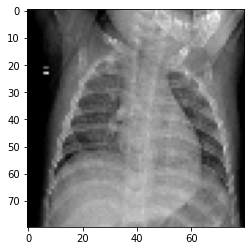

In [0]:
# import data viz package
import matplotlib.pyplot as plt

# get first image
first_image = X[0,:,:,0]

# display image
plt.imshow(first_image, cmap='gray')
plt.show()

In [0]:
#@markdown How many images are there?
number_of_images =  2000#@param {type:"integer"}
submit_answer('task_5', number_of_images)

✔️ Correct! You can progress to the next section


In [0]:
#@markdown How many pixels wide are the images?
image_width =  80#@param {type:"integer"}
submit_answer('task_6', image_width)

✔️ Correct! You can progress to the next section


In [0]:
#@markdown How many pixels tall are the images?
image_height =  80#@param {type:"integer"}
submit_answer('task_7', image_height)

✔️ Correct! You can progress to the next section


In [0]:
#@markdown How many channels of colour are there in the images?
colour_channels =  1#@param {type:"integer"}
submit_answer('task_8', colour_channels)

✔️ Correct! You can progress to the next section


## 8. Let's look at the corrisponding label for the image displayed above.

In [0]:
# get the first label
first_label = y[0]
first_label

0.0

In our dataset:

`1` =  `pneumonia`

`0` = `no pneumonia (normal)` 

So that first image conatains **no pneumonia**

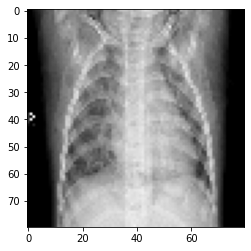

In [0]:
# diplsay the last image in our dataset

last_image = X[-1,:,:,0]
plt.imshow(last_image, cmap='gray')
plt.show()

In [0]:
# get the corrisponding label
last_label = y[-1]
last_label

1.0

In [0]:
#@title 9. What is the label/class for the last image?
image_label = "pneumonia" #@param ["pneumonia", "no pneumonia", "[select an option]"]
print(image_label)
submit_answer('task_9', image_label)

pneumonia
✔️ Correct! You can progress to the next section


## 10. Let's see how many of each label we have

In [0]:
# count the frequency of each label
number_of_pneumonia = (y==1).sum()
number_of_normal = (y==0).sum()

print('number of pneumonia images:',number_of_pneumonia)
print('number of normal images:',number_of_normal)

number of pneumonia images: 1000
number of normal images: 1000


# 11. Quick summary:
We have just imported our dataset of 2000 input images that are each 80x80 resolution and single channel (grayscale). We also have corresponding labels of 0's and 1's where `0 = normal`, and `1 = pneumonia`. There is an equal balance of normal and pneumonia images (1000 normal, 1000 pneumonia). 



---



## 12. Split data into `train` and `test` datasets
We will partition our data (`X` and `y`) into a `train` set that our neural network will learn, and a `test` set that we will use to test if our neural network did in fact learn how to recognise pneumonia.

In [0]:
# import package that will do the train/test split of our data
from sklearn.model_selection import train_test_split

# split out data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## 13. Build Neural Network for predicting based on our images
We will now create our neural network (the specific type of NN is a *Convolutional Neural Network for Binary Classification*).

In [0]:
# import packages for building a neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

Here we will define the layers of our neural network, what each of these do is out of scope for this lesson, but you can see that the first layer has `input_shape=(80, 80, 1)` which you might remember being the resolution and colour channels of our images.

The last layer is `Dense(1, activation='sigmoid')` which is what we use to tell the neural network to predict a number between 0 or 1. If you are curious you can look up what a "**sigmoid function**" is and you can maybe see why we use it in predicting 0 or 1 problems (Binary Classification).

In [0]:
# create our neural network model
model = Sequential()

# define each layer 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(80, 80, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# compile model our model
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [0]:
#@title What is the input to the neural network model?
model_input = "80x80 grayscale image (80, 80, 1)" #@param ["60x60 colour image (60, 60, 3)", "80x80 colour image (80, 80, 3)", "90x90 colour image (90, 90, 3)", "60x60 grayscale image (60, 60, 1)", "80x80 grayscale image (80, 80, 1)", "90x90 grayscale image (90, 90, 1)", "[select an option]"]
print(model_input)
submit_answer('task_10', model_input)

80x80 grayscale image (80, 80, 1)
✔️ Correct! You can progress to the next section


In [0]:
#@title What is the output of the neural network model? 
model_output = "a number between 0 and 1 inclusive (0 \u003C= value \u003C=1)" #@param ["either \"normal\" or \"pneumonia\"", "either 1 or 0", "a number between 0 and 1 inclusive (0 \u003C= value \u003C=1)", "[select an option]"]
print(model_output)
submit_answer('task_11', model_output)

a number between 0 and 1 inclusive (0 <= value <=1)
✔️ Correct! You can progress to the next section


## 14. Train our Neural Network using our training dataset

In [0]:
# train the model for 2 epochs with our training data, and test using our test data 
training_job = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=2)
submit_answer('task_12', 'completed training')

Epoch 1/2
44/44 [==============================] - 38s 859ms/step - loss: 0.9674 - accuracy: 0.6243 - val_loss: 0.3754 - val_accuracy: 0.8500
Epoch 2/2
44/44 [==============================] - 37s 847ms/step - loss: 0.3094 - accuracy: 0.8650 - val_loss: 0.3094 - val_accuracy: 0.8767
✔️ Correct! You can progress to the next section


## 15. Look at the performance of the model change whilst training

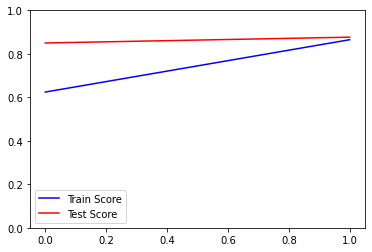

In [0]:
# extract the accuracy on our training data (accuracy) and the accuracy on our
# test data (val_accuracy) as our model was training/learning
train_score = training_job.history['accuracy']
test_score = training_job.history['val_accuracy']

# plot scores
plt.plot(train_score, c='b', label='Train Score')
plt.plot(test_score, c='r', label='Test Score')
plt.ylim(0,1)
plt.legend()
plt.show()

### 16. Let's make a prediction on a single image

In [0]:
# let's look at the shape of a single image
X_test[0].shape

(80, 80, 1)

In [0]:
# keras is expecting a list of images (even when you only want to predict on one)
# so we need to add an extra dimension onto our image. It's silly but necessary.
np.expand_dims(X_test[0], axis=0).shape

(1, 80, 80, 1)

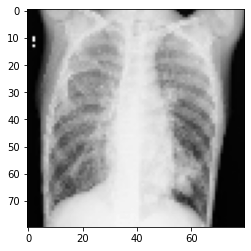

array([[0.9304816]], dtype=float32)

In [0]:
# view the image we are about to predict on
plt.imshow(X_test[0,:,:,0], cmap='gray')
plt.show()

# get prediction
model.predict(np.expand_dims(X_test[0], axis=0))

In [0]:
#@title What is the prediction output from model? 
predict_output = "a decimal number" #@param ["a decimal number", "either 1 or 0", "[select an option]"]
print(predict_output)
submit_answer('task_13', predict_output)

a decimal number
✔️ Correct! You can progress to the next section


## 17. Let's call the `predict_classes` to get a binary output.

In [0]:
model.predict_classes(np.expand_dims(X_test[0], axis=0))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1]], dtype=int32)

In [0]:
#@title What is the decision threshold used in the `predict_classes` function? 
threshold = "0.5" #@param ["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0", "[select an option]"]
print(threshold)
submit_answer('task_14', threshold)

0.5
✔️ Correct! You can progress to the next section


### Let's compare the the prediction against the actual answer:

In [0]:
# get the true label stored in y_test
y_test[0]

1.0

## 18. Show the probablities/confidence of pneumonia on 20 images from the test data

each line represents a single image


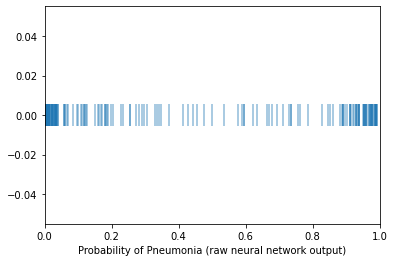

In [0]:
data_to_predict = X_test[:200]
probabilitie_of_pneumonia = model.predict(data_to_predict)

print('each line represents a single image')

plt.scatter(probabilitie_of_pneumonia, np.zeros(len(data_to_predict)),marker='|', alpha=0.5, s=500)
plt.xlim(0,1)
plt.xlabel('Probability of Pneumonia (raw neural network output)')
plt.show()

if len(probabilitie_of_pneumonia) < 50:
  print(probabilitie_of_pneumonia)

# 19. Show what classification those images would get

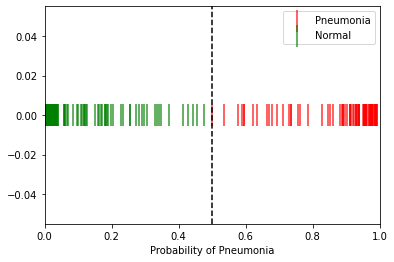

In [0]:
class_predictions = model.predict_classes(data_to_predict)

plt.scatter(probabilitie_of_pneumonia[class_predictions == 1], 
            np.zeros(len(probabilitie_of_pneumonia))[ (class_predictions ==1 ).squeeze()],
            marker='|', alpha=0.8, s=500, label='Pneumonia', c='r')

plt.scatter(probabilitie_of_pneumonia[class_predictions == 0], 
            np.zeros(len(probabilitie_of_pneumonia))[(class_predictions == 0).squeeze()],
            marker='|', alpha=0.8, s=500, label='Normal', c='g')

plt.legend()
plt.xlim(0,1)
plt.xlabel('Probability of Pneumonia')

# draw the decision threshold boundary
plt.axvline(0.5, linestyle='dashed',c='black')

plt.show()

## 20. Let's look at the confusion matrix  

In [0]:
# import package that will generate the confusion matrix scores
from sklearn.metrics import confusion_matrix
# import packages that will help display the scores
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


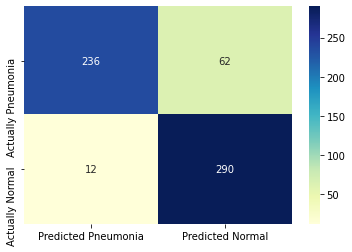

In [0]:
# generate confusion matrix scores
confusion_matrix_scores = confusion_matrix(y_test, model.predict_classes(X_test), labels=[1, 0])

# display scores as a heatmap
df = pd.DataFrame(confusion_matrix_scores, 
                  columns = ["Predicted Pneumonia", "Predicted Normal"],
                  index = ["Actually Pneumonia", "Actually Normal"])

sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

In [0]:
#@title What is the **top-left** quadrant showing?
top_left = "true positives" #@param ["false positives", "true positives", "false negatives", "true negatives", "[select an option]"]
print(top_left)
submit_answer('task_15', top_left)


true positives
✔️ Correct! You can progress to the next section


In [0]:
#@title What is the **top-right** quadrant showing?
top_right = "false negatives" #@param ["false positives", "true positives", "false negatives", "true negatives", "[select an option]"]
print(top_right)
submit_answer('task_16', top_right)

false negatives
✔️ Correct! You can progress to the next section


In [0]:
#@title What is the **bottom-left** quadrant showing?
bottom_left = "false positives" #@param ["false positives", "true positives", "false negatives", "true negatives", "[select an option]"]
print(bottom_left)
submit_answer('task_17', bottom_left)

false positives
✔️ Correct! You can progress to the next section


In [0]:
#@title What is the **bottom-right** quadrant showing?
bottom_right = "true negatives" #@param ["false positives", "true positives", "false negatives", "true negatives", "[select an option]"]
print(bottom_right)
submit_answer('task_18', bottom_right)

true negatives
✔️ Correct! You can progress to the next section


# 21. Lets calulate the Precision and Recall

In [0]:
tp, fn, fp, tn = confusion_matrix_scores.ravel()

precision = tp / ( tp + fp )
recall =  tp / ( tp + fn )

print('precision -', precision)
print('recall -', recall)

precision - 0.9516129032258065
recall - 0.7919463087248322


## 22. Let's alter the prediction boundary threshold

In [0]:
prediction_probabilities = model.predict(X_test)

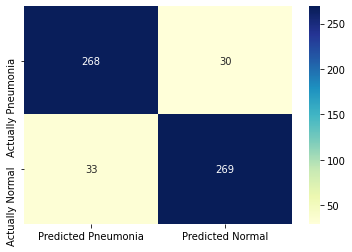

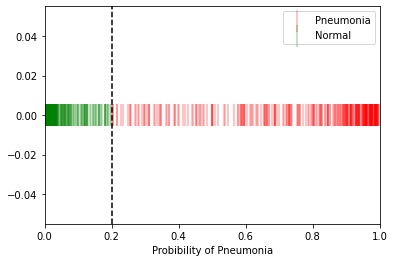

precision - 0.8903654485049833
recall - 0.8993288590604027


In [0]:
#@title Move the threshold between 0 and 1 and see how the confusion matrix and precision/recall scores at the bottom change. { run: "auto" }
THRESHOLD = 0.2 #@param {type:"slider", min:0, max:1, step:0.1}

# THRESHOLD = 0.9
prediction_classes = prediction_probabilities>THRESHOLD

# generate confusion matrix scores
confusion_matrix_scores = confusion_matrix(y_test, prediction_classes, labels=[1, 0])

# display scores as a heatmap
df = pd.DataFrame(confusion_matrix_scores, 
                  columns = ["Predicted Pneumonia", "Predicted Normal"],
                  index = ["Actually Pneumonia", "Actually Normal"])

sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu")
plt.show()


# plt.scatter(prediction_probabilities, np.zeros(len(prediction_probabilities)),marker='|', alpha=0.5, s=500)
# plt.xlim(0,1)
# plt.xlabel('Probibility of Pneumonia')
# plt.show()

# display how the test images are being classified based on their probabilities
plt.scatter(prediction_probabilities[prediction_classes == 1], 
            np.zeros(len(prediction_probabilities))[ (prediction_classes ==1 ).squeeze()],
            marker='|', alpha=0.3, s=500, label='Pneumonia', c='r')

plt.scatter(prediction_probabilities[prediction_classes == 0], 
            np.zeros(len(prediction_probabilities))[(prediction_classes == 0).squeeze()],
            marker='|', alpha=0.3, s=500, label='Normal', c='g')


plt.legend()
plt.xlim(0,1)
plt.xlabel('Probibility of Pneumonia')

# draw the decision threshold boundary
plt.axvline(THRESHOLD, linestyle='dashed',c='black')

plt.show()

# calculate precision and recall
tp, fn, fp, tn = confusion_matrix_scores.ravel()
precision = tp / ( tp + fp )
recall =  tp / ( tp + fn )
print('precision -', precision)
print('recall -', recall)

In [0]:
#@title If you wanted to absolutely minimise how many people you falsely diagnose as having pneumonia, what decision threshold would you use? (The answer you enter doesn't need to be precise.)
threshold =  0.8#@param {type:"number"}
print(threshold)

if threshold >= 0.98:
  threshold_level = 'peaked'
elif threshold >= 0.7:
  threshold_level = 'high'
elif threshold >= 0.4: 
  threshold_level = 'middle'
elif threshold >= 0.02:
  threshold_level = 'low'
else:
  threshold_level = 'peaked'

if threshold_level == 'peaked':
  print("HINT: you don't want your threshold to be 0 or 1 (or very very close to),\n test out what happens when you do that above and look closely at the confusion matrix.") 

submit_answer('task_19', threshold_level)

0.8
✔️ Correct! You can progress to the next section


In [0]:
#@title If the negative impact of false postives vs false negatives was roughly equal, what decision threshold would you use? (The answer you enter doesn't need to be precise.)
threshold = 0.5 #@param {type:"number"}
print(threshold)

if threshold >= 0.98:
  threshold_level = 'peaked'
elif threshold >= 0.7:
  threshold_level = 'high'
elif threshold >= 0.4: 
  threshold_level = 'middle'
elif threshold >= 0.02:
  threshold_level = 'low'
else:
  threshold_level = 'peaked'

if threshold_level == 'peaked':
  print("HINT: you don't want your threshold to be 0 or 1 (or very very close to),\n test out what happens when you do that above and look closely at the confusion matrix.") 

submit_answer('task_20', threshold_level)

0.5
✔️ Correct! You can progress to the next section


## 23. When you want to simply "deploy" your model with its new threshold

In [0]:
# predict as you would normally and compare the output with your desired threshold
model.predict(X_test) > 0.8

array([[ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

## 24. Lesson Completed 🎉
To recap, in this notebook we:

1.   Imported data and built an image classifier
2.   Got raw score predictions and class predictions from a model
3.   Visualised a model performance using a confusion matrix
4.   🌟Optimised a model decision threshold using Precision/Recall scores
5.   Deployed a model using your desired decision threshold.